##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 13s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


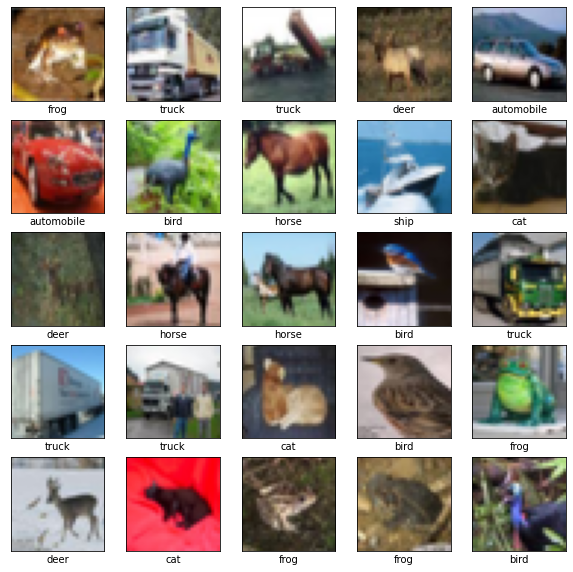

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

# Loss Function vs Cost Function

***A loss function/error function*** is for a single training example/input.***A cost function,*** on the other hand, is the average loss over the entire training dataset.

The optimization strategies aim at “minimizing the cost function”.

$J(\theta)$ is loss function in neural networks

## loss functions


https://medium.com/@vinodhb95/lost-function-and-its-type-f7fcec45c724

https://keras.io/api/losses/


https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/

## accuracy



https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

https://keras.io/api/metrics/


## Gradient descent
$θ ← θ – η∇_θJ(θ)$

learning rate η.

$\theta$  are weights

$J(\theta)$ is loss function

$∇_θJ(θ)$ is loss functions derivative  

It does not care about what the earlier gradient

## Momentum optimisation(SGD)

 ***Momentum algorithm(SGD)***

1 . $m =βm − η∇_θJ(θ)$

2 . $θ=θ + m$

***Terminal velocity is(momentum=massxvelocity):***

$m=\frac{− η∇_θJ(θ)}{1-\beta}$

if $\beta=0.9$ then

$m=\frac{− η∇_θJ(θ)}{1-0.9}$

$m=− 10η∇_θJ(θ)$

SGD is 10 times faster than gradient descent


 ***Nesterov Accelerated Gradient algorithm***


1 . $m =βm − η∇_θJ(θ+βm)$

2 . $θ=θ + m$

IN Nesterov formula weights update convergence is fast(valley of loss curve is reached fast)

SYNTAX:
tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=True,name='SGD')

##Animations for gradient descent

https://towardsdatascience.com/animations-of-gradient-descent-and-loss-landscapes-of-neural-networks-in-python-e757f3584057

From above link answer following:

Q What are xaxis,yaxis and z axis for animations shown above?(Hint:weights,loss)

Q.What is loss at global minima?



In [9]:
sgd=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=False,name='SGD')
model_SGD=model
model_SGD.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_SGD = model_SGD.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

model_SGD.save('model_SGD.h5')

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.6395 - accuracy: 0.3983 - val_loss: 1.3321 - val_accuracy: 0.5246
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2100 - accuracy: 0.5669 - val_loss: 1.0965 - val_accuracy: 0.6115
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0373 - accuracy: 0.6319 - val_loss: 1.0174 - val_accuracy: 0.6415
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9289 - accuracy: 0.6751 - val_loss: 0.9820 - val_accuracy: 0.6620
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8408 - accuracy: 0.7040 - val_loss: 0.9592 - val_accuracy: 0.6713
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7719 - accuracy: 0.7294 - val_loss: 0.9858 - val_accuracy: 0.6673
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7202 - accuracy: 0.7463 - val_loss: 0.9655 - val_accuracy

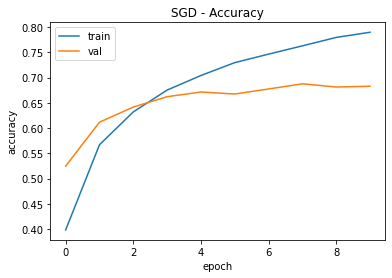

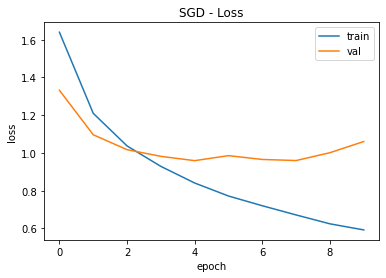

In [10]:
# SGD
plt.plot(history_SGD.history['accuracy'])
plt.plot(history_SGD.history['val_accuracy'])
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_SGD.history['loss'])
plt.plot(history_SGD.history['val_loss'])
plt.title('SGD - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Loss.jpg')
plt.show()



##AdaGrad algorithm

1. $s =s + ∇_θJ( θ) ⊗ ∇_θJ( θ)$

(recall that the ⊗ symbol represents the element-wise multiplication). 

This vectorized form is equivalent
to computing ***square of partial derivatives*** $s_i ← s_i + (∂ J(θ) / ∂ θ_i)^2$ for each element $s_i$ of the vector s



2. $θ= θ − η ∇_θJ(θ) ⊘ \sqrt{s + ε}$


the ⊘ symbol represents theelement-wise division, and ε is a smoothing term to avoid division by zero, typicallyset to 10–10).

 This vectorized form is equivalent to simultaneously computing
$θ_i =θ_i −\frac{ η ∂J( θ) / ∂θ_i}{\sqrt{ si + ε}} $for all parameters $θ_i$


1. AdaGrad frequently performs well for simple quadratic problems, but it often ***stops too early when training neural networks***. The learning rate gets scaled down so much that the algorithm ends up stopping entirely before reaching the global optimum.

2. So even though Keras has an Adagrad optimizer, ***you should not use it to train deep neural networks*** (it may be efficient for simpler tasks such as Linear Regression, though).Still, understanding AdaGrad is helpful to grasp the other adaptive learning rate optimizers.

In [11]:
model_Adagrad=model
adagrad=tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1,epsilon=1e-07,name='Adagrad')



model_Adagrad.compile(optimizer=adagrad,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_Adagrad = model_Adagrad.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

model_Adagrad.save('model_Adagrad.h5')

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3879 - accuracy: 0.8647 - val_loss: 0.9590 - val_accuracy: 0.7133
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3367 - accuracy: 0.8834 - val_loss: 0.9640 - val_accuracy: 0.7164
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3170 - accuracy: 0.8904 - val_loss: 0.9701 - val_accuracy: 0.7188
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3040 - accuracy: 0.8954 - val_loss: 0.9768 - val_accuracy: 0.7190
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2942 - accuracy: 0.8987 - val_loss: 0.9818 - val_accuracy: 0.7197
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2863 - accuracy: 0.9013 - val_loss: 0.9860 - val_accuracy: 0.7199
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2797 - accuracy: 0.9044 - val_loss: 0.9904 - val_accuracy:

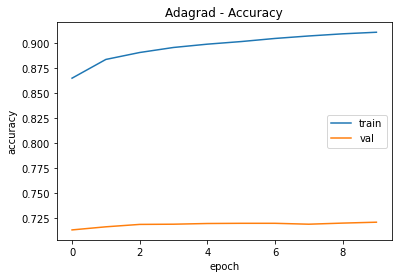

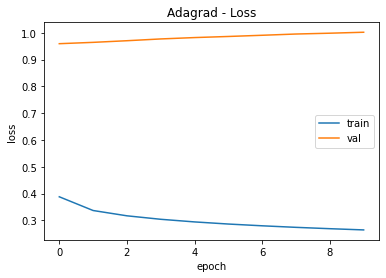

In [12]:
# Adagrad
plt.plot(history_Adagrad.history['accuracy'])
plt.plot(history_Adagrad.history['val_accuracy'])
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_Adagrad.history['loss'])
plt.plot(history_Adagrad.history['val_loss'])
plt.title('Adagrad - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Loss.jpg')
plt.show()


## RMSProp algorithm

1 . $s=\rho s + (1 − \rho) ∇_θJ( θ) ⊗ ∇_θJ (θ)$


2 . $θ =θ − η ∇_θJ (θ) ⊘ \sqrt{s + ε}$

As we’ve seen, AdaGrad runs the risk of slowing down a bit too fast and never converging to the global optimum. 

The RMSProp algorithm fixes this by ***accumulating only the gradients from the most recent iterations*** (as opposed to all the gradients since the beginning of training). 

It does so by using ***exponential decay in the first step***

In [13]:
rmsprop=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.9,epsilon=1e-07,centered=False,name='RMSprop')

model_RMSprop=model
model_RMSprop.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_RMSprop = model_RMSprop.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

model_RMSprop.save('model_RMSprop.h5')

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4223 - accuracy: 0.8506 - val_loss: 1.0628 - val_accuracy: 0.7012
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3670 - accuracy: 0.8709 - val_loss: 1.2159 - val_accuracy: 0.7026
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3193 - accuracy: 0.8879 - val_loss: 1.3358 - val_accuracy: 0.7050
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2812 - accuracy: 0.9014 - val_loss: 1.3735 - val_accuracy: 0.6984
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2458 - accuracy: 0.9156 - val_loss: 1.5723 - val_accuracy: 0.7013
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2219 - accuracy: 0.9237 - val_loss: 1.6708 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2088 - accuracy: 0.9298 - val_loss: 1.8640 - val_accuracy

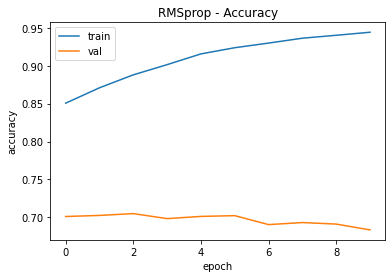

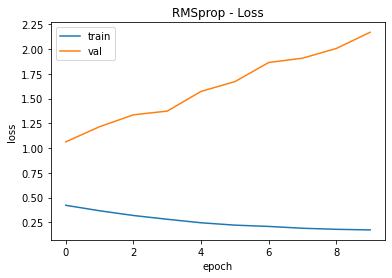

In [14]:
# RMSprop
plt.plot(history_RMSprop.history['accuracy'])
plt.plot(history_RMSprop.history['val_accuracy'])
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_RMSprop.history['loss'])
plt.plot(history_RMSprop.history['val_loss'])
plt.title('RMSprop - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Loss.jpg')
plt.show()


## Adam algorithm

Adam which stands for adaptive moment estimation, combines the ideas of momentum
optimization and RMSProp.
1. just like momentum optimization, it keeps track of an ***exponentially decaying average of past gradients;***
2. and just like RMSProp, it keeps track of an ***exponentially decaying average of past squared gradients*** 

1 . $m= β_1m − (1 − β_1) ∇_θJ (θ)$

2 . $s= β_2s + (1 − β_2) ∇_θJ (θ) ⊗ ∇_θJ (θ)$

3 . $\hat{m }=\frac{m}{(1 − β_1)^t}$

4 . $\hat{s} =\frac{s}{(1 − β_2)^t}$

5 . $θ=θ + η\hat{m} ⊘\sqrt{ \hat{s} + ε}$


here t=iteration number

In [15]:
model_adam=model
adam=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam') 

model_adam.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_adam = model_adam.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
model_adam.save('model_adam.h5')

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2181 - accuracy: 0.9283 - val_loss: 1.9574 - val_accuracy: 0.6755
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1821 - accuracy: 0.9384 - val_loss: 1.9511 - val_accuracy: 0.6834
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1904 - accuracy: 0.9359 - val_loss: 2.0030 - val_accuracy: 0.6808
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1653 - accuracy: 0.9444 - val_loss: 1.9960 - val_accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1598 - accuracy: 0.9460 - val_loss: 2.1258 - val_accuracy: 0.6905
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1531 - accuracy: 0.9489 - val_loss: 2.1048 - val_accuracy: 0.6838
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1469 - accuracy: 0.9505 - val_loss: 2.1865 - val_accuracy:

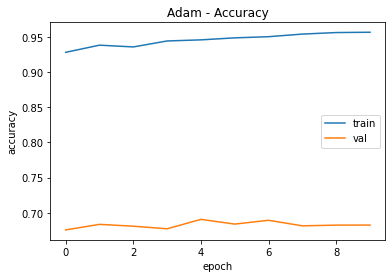

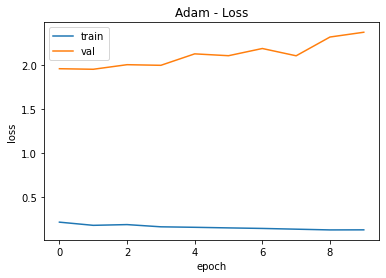

In [16]:
# Adam
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Adam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Loss.jpg')
plt.show()


## Adamax algorithm

***AdaMax more stable than Adam***

Adam which stands for adaptive moment estimation, combines the ideas of momentum
optimization and RMSProp.
1. just like momentum optimization, it keeps track of an ***exponentially decaying average of past gradients;***
2.  scale down value s is maximum of $max(β_2s,  ∇_θJ (θ))$
3. It does not use equation 3 and 4 of Adam optimiser

1 . $m= β_1m − (1 − β_1) ∇_θJ (θ)$

2 . $s= max(β_2s,  ∇_θJ (θ))$

3 . $θ=θ + ηm ⊘\sqrt{s}$




In [17]:
model_Adamax=model
adamax=tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,name='Adamax')


model_Adamax.compile(optimizer=adamax,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_Adamax = model_Adamax.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

model_Adamax.save('model_Adamax.h5')

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 2.3829 - val_accuracy: 0.7009
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0110 - accuracy: 0.9982 - val_loss: 2.5068 - val_accuracy: 0.6998
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 2.6657 - val_accuracy: 0.7046
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 2.8230 - val_accuracy: 0.7077
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.9626 - val_accuracy: 0.7082
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.1095 - val_accuracy: 0.7085
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 6.0057e-04 - accuracy: 1.0000 - val_loss: 3.2526 - val_accur

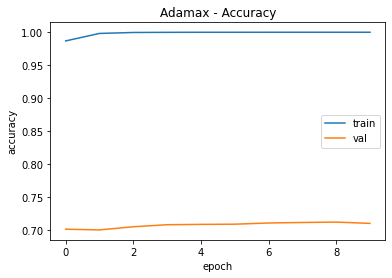

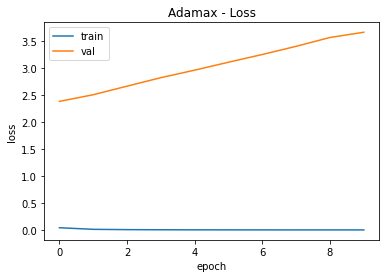

In [18]:
# Adamax
plt.plot(history_Adamax.history['accuracy'])
plt.plot(history_Adamax.history['val_accuracy'])
plt.title('Adamax - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adamax-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_Adamax.history['loss'])
plt.plot(history_Adamax.history['val_loss'])
plt.title('Adamax - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adamax-Loss.jpg')
plt.show()


### Evaluate the model

In [19]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [20]:
#print(test_acc)

NameError: ignored

Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

## Nadam optimiser

Nadam optimization is Adam optimization plus the Nesterov trick, so it will
often converge slightly faster than Adam. 

In his report introducing this technique, the researcher Timothy Dozat compares many different optimizers on various tasks and finds that Nadam generally outperforms Adam but is sometimes outperformed by RMSProp.

***Nesterov Accelerated Gradient algorithm***

1 . $m= β_1m − (1 − β_1) ∇_θJ (θ+\beta_1m)$

2 . $s= max(β_2s,  ∇_θJ (θ))$

3 . $θ=θ + ηm ⊘\sqrt{s}$


IN Nesterov formula weights update convergence is fast(valley of loss curve is reached fast)


In [21]:
model_Nadam=model
nadam=tf.keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,name='Nadam')

model_Nadam.compile(optimizer=nadam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_Nadam = model_Nadam.fit(train_images, train_labels, epochs=10,verbose=2, 
                    validation_data=(test_images, test_labels))

model_Nadam.save('model_Nadam.h5')

Epoch 1/10
1563/1563 - 12s - loss: 0.1039 - accuracy: 0.9689 - val_loss: 2.9322 - val_accuracy: 0.6862 - 12s/epoch - 8ms/step
Epoch 2/10
1563/1563 - 8s - loss: 0.1161 - accuracy: 0.9640 - val_loss: 2.9692 - val_accuracy: 0.6773 - 8s/epoch - 5ms/step
Epoch 3/10
1563/1563 - 8s - loss: 0.1157 - accuracy: 0.9631 - val_loss: 2.7253 - val_accuracy: 0.6840 - 8s/epoch - 5ms/step
Epoch 4/10
1563/1563 - 8s - loss: 0.1128 - accuracy: 0.9647 - val_loss: 2.6925 - val_accuracy: 0.6764 - 8s/epoch - 5ms/step
Epoch 5/10
1563/1563 - 8s - loss: 0.1080 - accuracy: 0.9654 - val_loss: 2.8127 - val_accuracy: 0.6872 - 8s/epoch - 5ms/step
Epoch 6/10
1563/1563 - 8s - loss: 0.1007 - accuracy: 0.9679 - val_loss: 2.8350 - val_accuracy: 0.6776 - 8s/epoch - 5ms/step
Epoch 7/10
1563/1563 - 8s - loss: 0.1040 - accuracy: 0.9669 - val_loss: 2.8348 - val_accuracy: 0.6905 - 8s/epoch - 5ms/step
Epoch 8/10
1563/1563 - 8s - loss: 0.1072 - accuracy: 0.9659 - val_loss: 2.7885 - val_accuracy: 0.6869 - 8s/epoch - 5ms/step
Epoch 

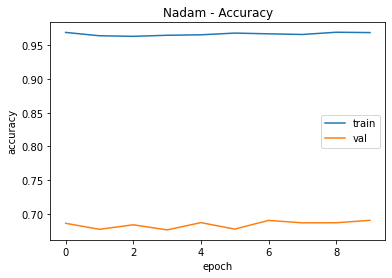

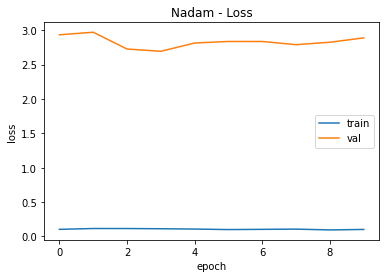

In [22]:
# Nadam
plt.plot(history_Nadam.history['accuracy'])
plt.plot(history_Nadam.history['val_accuracy'])
plt.title('Nadam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Nadam-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_Nadam.history['loss'])
plt.plot(history_Nadam.history['val_loss'])
plt.title('Nadam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Nadam-Loss.jpg')
plt.show()



# Adadelta

## only for reference no need for depth study

https://medium.com/@neuralthreads/adadelta-optimizer-which-was-developed-to-eliminate-the-need-for-the-learning-rate-93e8f295abc7

In [23]:
model_Adadelta=model

adadelta=tf.keras.optimizers.Adadelta(learning_rate=0.001,rho=0.95,epsilon=1e-07,name='Adadelta')
model_Adadelta.compile(optimizer=adadelta,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_Adadelta = model_Adadelta.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

model_Adadelta.save('model_Adadelta.h5')

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0568 - accuracy: 0.9813 - val_loss: 2.8692 - val_accuracy: 0.6915
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0522 - accuracy: 0.9829 - val_loss: 2.8570 - val_accuracy: 0.6927
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0487 - accuracy: 0.9841 - val_loss: 2.8479 - val_accuracy: 0.6932
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 2.8413 - val_accuracy: 0.6929
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0439 - accuracy: 0.9858 - val_loss: 2.8361 - val_accuracy: 0.6932
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 2.8322 - val_accuracy: 0.6942
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0406 - accuracy: 0.9865 - val_loss: 2.8295 - val_accuracy:

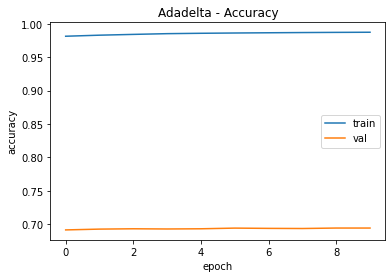

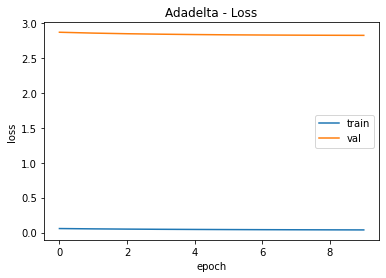

In [24]:
# Adadelta
plt.plot(history_Adadelta.history['accuracy'])
plt.plot(history_Adadelta.history['val_accuracy'])
plt.title('Adadelta - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_Adadelta.history['loss'])
plt.plot(history_Adadelta.history['val_loss'])
plt.title('Adadelta - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Loss.jpg')
plt.show()


#Follow The Regularized Leader (FTRL)

## only for reference no need for depth study

https://medium.com/@dhirajreddy13/factorization-machines-and-follow-the-regression-leader-for-dummies-7657652dce69


In [25]:
model_Ftrl=model
ftrl=tf.keras.optimizers.Ftrl(learning_rate=0.001,learning_rate_power=-0.5,initial_accumulator_value=0.1,l1_regularization_strength=0.0,l2_regularization_strength=0.0,name='Ftrl',l2_shrinkage_regularization_strength=0.0,beta=0.0)

model_Ftrl.compile(optimizer=ftrl,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_Ftrl = model_Ftrl.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

model_Ftrl.save('model_Ftrl.h5')

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3012 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy:

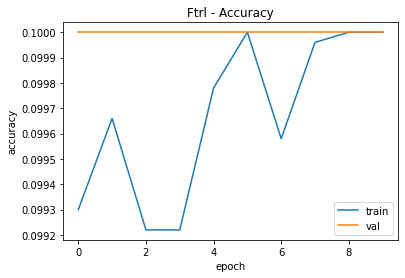

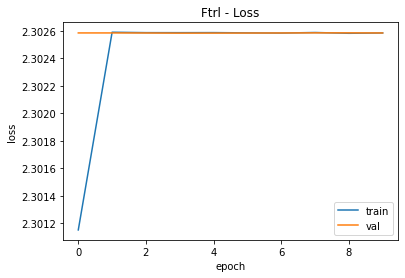

In [26]:
# Ftrl
plt.plot(history_Ftrl.history['accuracy'])
plt.plot(history_Ftrl.history['val_accuracy'])
plt.title('Ftrl - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Ftrl-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_Ftrl.history['loss'])
plt.plot(history_Ftrl.history['val_loss'])
plt.title('Ftrl - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Ftrl-Loss.jpg')
plt.show()

https://keras.io/api/metrics/

https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b



https://keras.io/api/losses/

https://medium.com/@vinodhb95/lost-function-and-its-type-f7fcec45c724

https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/

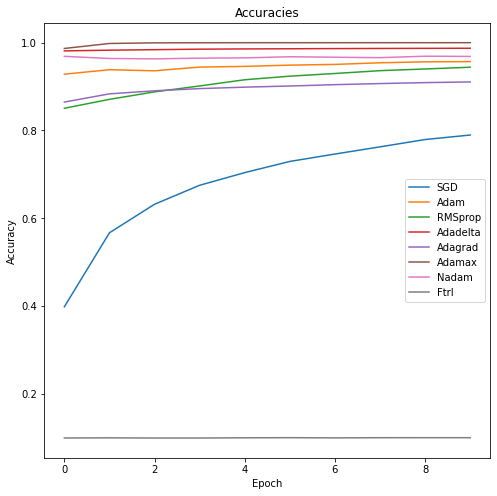

In [32]:
# Combined Training Accuracy Plot
fig = plt.figure(figsize=(8,8))
plt.plot(history_SGD.history['accuracy'])
plt.plot(history_adam.history['accuracy'])
plt.plot(history_RMSprop.history['accuracy'])
plt.plot(history_Adadelta.history['accuracy'])
plt.plot(history_Adagrad.history['accuracy'])
plt.plot(history_Adamax.history['accuracy'])
plt.plot(history_Nadam.history['accuracy'])

plt.plot(history_Ftrl.history['accuracy'])

plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad','Adamax','Nadam','Ftrl'])
plt.savefig('Combined-Accuracy.jpg', dpi=200)

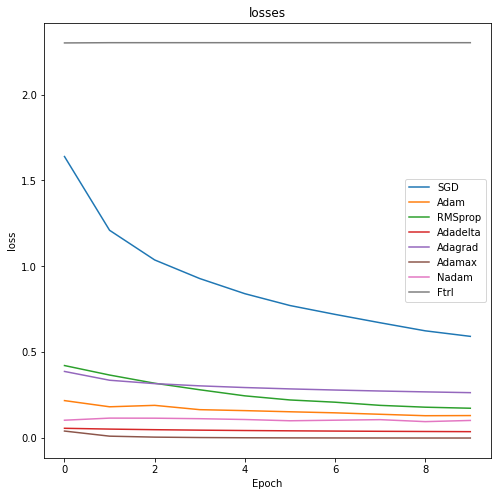

In [33]:
# Combined Training Accuracy Plot
fig = plt.figure(figsize=(8,8))
plt.plot(history_SGD.history['loss'])
plt.plot(history_adam.history['loss'])
plt.plot(history_RMSprop.history['loss'])
plt.plot(history_Adadelta.history['loss'])
plt.plot(history_Adagrad.history['loss'])
plt.plot(history_Adamax.history['loss'])
plt.plot(history_Nadam.history['loss'])

plt.plot(history_Ftrl.history['loss'])

plt.title('losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad','Adamax','Nadam','Ftrl'])
plt.savefig('Combined-loss.jpg', dpi=200)

# Gradient descent,Stochastic Gradient Descent,Min-Batch Gradient Descent

## only for reference no need for depth study

https://towardsdatascience.com/deep-learning-optimizers-436171c9e23f